<a href="https://colab.research.google.com/github/diogocf/Gattaca_-_A_Experiencia_Genetica/blob/main/Gattaca_A_experi%C3%AAncia_gen%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando o SDK do Google AI API
É necessário executar apenas uma vez.

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install -q -U requests

# Configurações do Google AI API

In [1]:
import google.generativeai as genai
from google.colab import userdata
import requests

## Configurando a API KEY

In [2]:
YOUR_API_KEY = userdata.get('YOUR_API_KEY')
genai.configure(api_key = YOUR_API_KEY)

## Configurando o modelo

In [3]:
# Set up the model
generation_config = {
  "temperature": 1,
  "candidate_count": 1
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
]

model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

# Carregando os prompts para Few-Shot

In [4]:
# Carrega o arquivo com os shots do repositório do Github
url = 'https://raw.githubusercontent.com/diogocf/Gattaca_-_A_Experiencia_Genetica/main/Few-Shot%20images/Few-Shots%20Prompts.json'
resposta = requests.get(url)

In [5]:
# resposta.content
few_shots_json = resposta.json()
few_shots_json

{'few_shots': ['Analise como o olhar, a expressão facial, postura e atitude da coluna INPUT se relacionam a algumas características, como força, resiliência, talentos, conquistas, feitos e profissão na coluna de OUTPUT. Você é um cientista que trabalha na área de genética e está estudando a relação entre postura quando criança e o que a pessoa conseguiu na vida adulta. Gere um conjunto de quais talentos a pessoa que foi descrita tem mais chance de desenvolver em formato de lista que tenha no máximo 5 itens. Lembre-se de que essa lista é fictícia. Depois, faça uma lista com 3 profissões que se encaixam com as características da lista anterior.',
  'input: 1. Olhar direto A criança olha diretamente para a câmera, o que pode indicar confiança, abertura e disposição para se conectar. 2. Sorriso genuíno O sorriso parece genuíno, com os olhos levemente apertados e as bochechas levantadas, sugerindo felicidade e contentamento. 3. Postura relaxada A postura da criança parece relaxada, com os o

In [10]:
# Envia os Few-Shots para o modelo
chat = model.start_chat()
chat.send_message(few_shots_json['few_shots'])

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': '## Análise da Linguagem Corporal e Projeção de Talentos e Profissões \n\nÉ importante ressaltar que a análise da linguagem corporal para determinar talentos e futuro profissional é uma prática especulativa e não possui base científica sólida. As características observadas podem indicar traços de personalidade, mas não garantem um futuro específico. \n\nDito isso, vamos analisar o último exemplo que você forneceu:\n\n**INPUT:**\n\n1. **Olhar direto:** Confiança e abertura.\n2. **Olhos brilhantes:** Curiosidade, inteligência.\n3. **Leve sorriso:** Contentamento, timidez.\n4. **Postura ereta:** Orgulho, autoconfiança.\n5. **Cabeça levemente inclinada:** Atitude aberta e receptiva.\n6. **Cabelo bem cuidado:** Cuidado com a aparência, orgulho da identidade.\n7. **Roupa formal:** Importância da ocasião, respeito.\n8. **Expressão calma:**

# Brincando com o chat bot

In [23]:
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Markdown

def input_foto():
  """ Mostra o prompt de entrada para carregar uma foto """
  foto_crianca = files.upload()

  """ Mostra a foto carregada """
  im = Image.open(BytesIO(foto_crianca[list(foto_crianca.keys())[0]]))
  plt.imshow(im)
  plt.xticks([])
  plt.yticks([])
  plt.show()

  return foto_crianca

Saving criança sorrindo images.jpg to criança sorrindo images (6).jpg


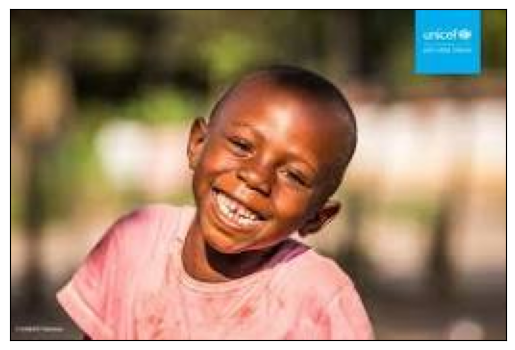

## Análise da Linguagem Corporal e Projeção de Talentos e Profissões: Um Espírito Livre e Alegre

A fotografia da criança transmite uma energia vibrante e cativante, expressando alegria, espontaneidade e uma conexão genuína com o observador. Essa combinação de características sugere um espírito livre e cheio de vida, com potencial para diversas áreas.

**Talentos:**

1. **Comunicação Cativante:** O sorriso largo, o olhar direto e a postura receptiva indicam uma habilidade natural para se comunicar e conectar com as pessoas, transmitindo suas ideias e emoções de forma autêntica e envolvente.
2. **Criatividade e Imaginação:** A atitude descontraída, a inclinação brincalhona da cabeça e a espontaneidade expressa na foto sugerem uma mente criativa e imaginativa, com potencial para se destacar em áreas artísticas e inovadoras.
3. **Entusiasmo Contagiante:** A alegria intensa e genuína, evidente no sorriso, nos olhos brilhantes e na energia geral da imagem, tem o poder de inspirar e contagia

In [ ]:
# Envia o prompt para descrever a foto
prompt_descrever_foto = 'analise o olhar, a expressão facial, postura, atitude, sentimento da criança na foto. Dê a resposta em formato de lista enumerado com no máximo 10 itens.'

# Envia o prompt com a foto
while 1 == 1:
  foto_crianca = input_foto()

  # Envia prompt para fazer a descrição da foto em um contexto diferente do chat
  image_content = Image.open(list(foto_crianca.keys())[0])
  prompt_descricao_foto = model.generate_content([prompt_descrever_foto, image_content]).text

  # Envia descrição da foto para receber a previsão genética com as profissões e talentos
  #Markdown(chat.send_message(prompt_descricao_foto).text) --> não mostra a saída, porque está dentro do loop
  print(chat.send_message(prompt_descricao_foto).text)
